In [59]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import pandas as pd
from scipy.stats import gaussian_kde


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [16]:
i_PRI = 22

y_0 =  y[tX[:, i_PRI]==0]
tx_0 = tX[tX[:, i_PRI]==0]

In [17]:
tx_0

array([[ 143.905,   81.417,   80.943, ..., -999.   , -999.   ,    0.   ],
       [ 175.864,   16.915,  134.805, ..., -999.   , -999.   ,    0.   ],
       [ 105.594,   50.559,  100.989, ..., -999.   , -999.   ,    0.   ],
       ...,
       [-999.   ,   58.179,   68.083, ..., -999.   , -999.   ,    0.   ],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

In [18]:
tx_n = pd.DataFrame(tx_0)

In [21]:
tx_n.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,99913.000000,99913.000000,99913.000000,99913.000000,99913.0,99913.0,99913.0,99913.000000,99913.000000,99913.000000,...,99913.000000,99913.00000,99913.0,99913.0,99913.0,99913.0,99913.0,99913.0,99913.0,99913.0
mean,-172.077816,58.786239,81.870309,13.823867,-999.0,-999.0,-999.0,2.664961,13.823867,76.377011,...,-0.024443,125.86081,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
std,494.022274,32.003551,38.043669,16.674707,0.0,0.0,0.0,0.693295,16.674707,23.561057,...,1.811006,53.08660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-999.000000,0.002000,7.120000,0.000000,-999.0,-999.0,-999.0,0.277000,0.000000,46.104000,...,-3.142000,13.67800,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
25%,-999.000000,35.062000,60.947000,2.275000,-999.0,-999.0,-999.0,2.338000,2.275000,61.297000,...,-1.583000,87.95100,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
50%,96.528000,62.144000,75.533000,6.677000,-999.0,-999.0,-999.0,2.822000,6.677000,71.586000,...,-0.051000,119.47900,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
75%,126.793000,79.650000,94.135000,24.202000,-999.0,-999.0,-999.0,3.095000,24.202000,85.242000,...,1.546000,156.41800,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
max,863.647000,570.115000,1349.351000,2834.999000,-999.0,-999.0,-999.0,5.684000,2834.999000,1324.678000,...,3.142000,1391.52900,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0


In [22]:
tx_1 = np.delete(tx_0, [4,5,6,12, 22,23,24,25,26,27,28,29], axis=1)
tx_n = pd.DataFrame(tx_1)

In [23]:
tx_n.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.00000
mean,-172.077816,58.786239,81.870309,13.823867,2.664961,13.823867,76.377011,1.392763,-0.910077,34.012723,-0.024858,-0.015657,42.364287,-0.052311,0.042352,31.536761,-0.024443,125.86081
std,494.022274,32.003551,38.043669,16.674707,0.693295,16.674707,23.561057,0.581596,0.936707,15.229541,1.233430,1.817351,14.585979,1.310855,1.817844,20.294541,1.811006,53.08660
min,-999.000000,0.002000,7.120000,0.000000,0.277000,0.000000,46.104000,0.127000,-1.414000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.67800
25%,-999.000000,35.062000,60.947000,2.275000,2.338000,2.275000,61.297000,0.968000,-1.404000,23.655000,-0.960000,-1.586000,31.863000,-1.121000,-1.526000,18.001000,-1.583000,87.95100
50%,96.528000,62.144000,75.533000,6.677000,2.822000,6.677000,71.586000,1.318000,-1.364000,29.329000,-0.043000,-0.049000,38.969000,-0.104000,0.085000,29.538000,-0.051000,119.47900
75%,126.793000,79.650000,94.135000,24.202000,3.095000,24.202000,85.242000,1.728000,-1.123000,39.808000,0.900000,1.556000,49.007000,0.989000,1.621000,42.273000,1.546000,156.41800
max,863.647000,570.115000,1349.351000,2834.999000,5.684000,2834.999000,1324.678000,10.571000,1.414000,764.408000,2.494000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,1391.52900


In [25]:
#pd.plotting.scatter_matrix(tx_n)

In [28]:
df = tx_n.sample(1000)

In [31]:
#pd.plotting.scatter_matrix(df)

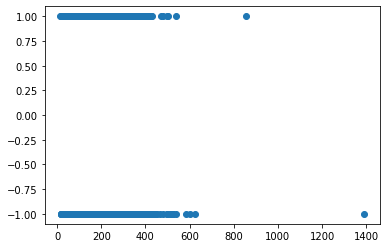

In [58]:
tx_n.shape[1]
plt.scatter(tx_n[17], y_0)
plt.heatmap(

In [61]:
xy = np.vstack([tx_n[0],y_0])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(tx_n, y_0, c=z, s=100)
plt.show()

KeyboardInterrupt: 

In [ ]:
indici = np.random(100)